# Data Cleaning

In [39]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
pip install -U pandas-profiling --user

Note: you may need to restart the kernel to use updated packages.


In [41]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

'C:\Program' is not recognized as an internal or external command,
operable program or batch file.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [42]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
from pandas_profiling import ProfileReport


ModuleNotFoundError: No module named 'pandas_profiling'

In [162]:
lg_census = pd.read_csv('census_16_2022.csv')
lg_census_copy = pd.read_csv('census_16_2022.csv')  #to have a copy of the original file
lg_census[:3]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Windsor Plaza,Cameron,Johnson-White,37,Head,Married,Male,Landscape architect,None,Christian
1,1,1,Windsor Plaza,Katherine,Johnson-White,26,Wife,Married,Female,"Presenter, broadcasting",None,None
2,2,1,Windsor Plaza,Jack,Cook,41,Lodger,Divorced,Male,Risk manager,None,Methodist


In [147]:
lg_census.count()

Unnamed: 0                       8175
House Number                     8175
Street                           8175
First Name                       8175
Surname                          8175
Age                              8175
Relationship to Head of House    8175
Marital Status                   6351
Gender                           8175
Occupation                       8175
Infirmity                        8175
Religion                         6314
dtype: int64

In [ ]:
lg_census.profile_report()

In [148]:
lg_census.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Windsor Plaza,Cameron,Johnson-White,37,Head,Married,Male,Landscape architect,None,Christian
1,1,1,Windsor Plaza,Katherine,Johnson-White,26,Wife,Married,Female,"Presenter, broadcasting",None,None
2,2,1,Windsor Plaza,Jack,Cook,41,Lodger,Divorced,Male,Risk manager,None,Methodist
3,3,2,Windsor Plaza,Marie,Allen,44,Head,Single,Female,Midwife,None,Catholic
4,4,3,Windsor Plaza,Janice,Harrison,55,Head,Single,Female,Warehouse manager,None,Christian


In [149]:
lg_census.isnull().sum()   #to check for headers with null values

Unnamed: 0                          0
House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1824
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1861
dtype: int64

In [150]:
#cleaning Marital Status
lg_census['Marital Status'].unique()
lg_census['Marital Status'].value_counts(dropna=False)

Single      2868
Married     2311
NaN         1824
Divorced     751
Widowed      410
D              6
S              2
W              2
M              1
Name: Marital Status, dtype: int64

In [175]:
lg_census['Marital Status'].fillna('Single',inplace=True)
#lg_census['Marital Status'].value_counts

In [176]:
lg_census['Marital Status'].value_counts(dropna=False)

Single      4694
Married     2312
Divorced     757
Widowed      412
Name: Marital Status, dtype: int64

In [177]:
lg_census['Marital Status'].replace({'D':'Divorced', 'S':'Single', 'W':'Widowed', 'M':'Married'}, inplace=True)  

In [178]:
lg_census['Marital Status'].value_counts(dropna=False)

Single      4694
Married     2312
Divorced     757
Widowed      412
Name: Marital Status, dtype: int64

In [155]:
lg_census= lg_census.drop('Unnamed: 0', axis=1)   #to drop the Unnamed column as it's not required


In [156]:
lg_census

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Windsor Plaza,Cameron,Johnson-White,37,Head,Married,Male,Landscape architect,None,Christian
1,1,Windsor Plaza,Katherine,Johnson-White,26,Wife,Married,Female,"Presenter, broadcasting",None,None
2,1,Windsor Plaza,Jack,Cook,41,Lodger,Divorced,Male,Risk manager,None,Methodist
3,2,Windsor Plaza,Marie,Allen,44,Head,Single,Female,Midwife,None,Catholic
4,3,Windsor Plaza,Janice,Harrison,55,Head,Single,Female,Warehouse manager,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8170,1,Wilson Barracks,Allan,Begum,26,Head,Single,Male,Nutritional therapist,None,Christian
8171,1,Wilson Barracks,Melissa,Evans,25,None,Divorced,Female,"Development worker, community",None,Catholic
8172,1,Wilson Barracks,Carly,Patel,25,None,Single,Female,"Journalist, magazine",None,Sikh
8173,1,Wilson Barracks,Gary,Tomlinson,26,None,Single,Male,Ophthalmologist,None,None


In [51]:
#lg_census.info

In [52]:
#cleaning Religion
lg_census['Religion'].unique()
lg_census['Religion'].value_counts(dropna=False) #to include values with Na

None           2768
Christian      1924
NaN            1861
Catholic        897
Methodist       513
Muslim          102
Sikh             69
Jewish           29
Baptist           3
Housekeeper       3
Agnostic          1
Nope              1
                  1
Private           1
Quaker            1
Buddist           1
Name: Religion, dtype: int64

In [53]:
lg_census['Religion'].fillna('None',inplace=True)  #to replace the NaN value to None as None has the highest occuring values
#lg_census['Religion'].value_counts

In [54]:
lg_census['Religion'].value_counts(dropna=False) #to confirm the NaN value is dropped

None           4629
Christian      1924
Catholic        897
Methodist       513
Muslim          102
Sikh             69
Jewish           29
Baptist           3
Housekeeper       3
Agnostic          1
Nope              1
                  1
Private           1
Quaker            1
Buddist           1
Name: Religion, dtype: int64

In [55]:
lg_census.drop(lg_census[lg_census['Religion'].isin([' ','Private','Nope','Housekeeper'])].index, inplace=True)
#to drop the unrealistic or joker entries for Religion column

In [56]:
lg_census['Religion'].value_counts(dropna=False) 
#to confirm the fake values are dropped

None         4629
Christian    1924
Catholic      897
Methodist     513
Muslim        102
Sikh           69
Jewish         29
Baptist         3
Agnostic        1
Quaker          1
Buddist         1
Name: Religion, dtype: int64

In [57]:
lg_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8169 entries, 0 to 8174
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8169 non-null   object
 1   Street                         8169 non-null   object
 2   First Name                     8169 non-null   object
 3   Surname                        8169 non-null   object
 4   Age                            8169 non-null   object
 5   Relationship to Head of House  8169 non-null   object
 6   Marital Status                 8169 non-null   object
 7   Gender                         8169 non-null   object
 8   Occupation                     8169 non-null   object
 9   Infirmity                      8169 non-null   object
 10  Religion                       8169 non-null   object
 11  employment status              8169 non-null   object
dtypes: object(12)
memory usage: 829.7+ KB


In [58]:
#cleaning Age

In [163]:
len(lg_census['Age'])

8175

In [166]:
three = [age for age in lg_census['Age'] if age == '3']
print(len(three))

93


In [167]:
lg_census['Age'].unique()

array(['37', '26', '41', '44', '55', '63', '36', '38', '57', '81', '79',
       '58', '65', '43', '53', '32', '34', '9', '20', '47', '19', '21',
       '45', '77', '68', '73', '75', '78', '54', '50', '80', '42', '66',
       '23', '24', '70', '27', '76', '35', '29', '62', '71', '46', '30',
       '13', '61', '8', '7', '64', '5', '4', '0', '56', '52', '17', '16',
       '3', '14', '28', '18', '15', '51', '31', '11', '49', '60', '33',
       '2', '1', '40', '10', '83', '48', '59', '25', '6', '39', '69',
       '67', '22', '74', '86', '12', '84', '72', '87', '86.15361167',
       '88', '105', '102', '91', '96', '82', '89', '98', '74.31823574',
       '70.31823574', '94', '101', '85', '90', '103', '97', '93', '92',
       '107', '62.87489477', '78.10140531', '80.10140531', '99', 'three',
       '80.99563212', '87.99563212', '114', '117', '55.53517458',
       '61.53517458', '95'], dtype=object)

In [168]:
lg_census['Age'].replace({'three':'3'}, inplace=True)  #replace the word value with a figure for all data to have same type and save with inplace

In [169]:
three = [age for age in lg_census['Age'] if age == '3']
print(len(three))

94


In [159]:
lg_census['Age'].unique()  #confirm this has been done

array(['37', '26', '41', '44', '55', '63', '36', '38', '57', '81', '79',
       '58', '65', '43', '53', '32', '34', '9', '20', '47', '19', '21',
       '45', '77', '68', '73', '75', '78', '54', '50', '80', '42', '66',
       '23', '24', '70', '27', '76', '35', '29', '62', '71', '46', '30',
       '13', '61', '8', '7', '64', '5', '4', '0', '56', '52', '17', '16',
       '3', '14', '28', '18', '15', '51', '31', '11', '49', '60', '33',
       '2', '1', '40', '10', '83', '48', '59', '25', '6', '39', '69',
       '67', '22', '74', '86', '12', '84', '72', '87', '86.15361167',
       '88', '105', '102', '91', '96', '82', '89', '98', '74.31823574',
       '70.31823574', '94', '101', '85', '90', '103', '97', '93', '92',
       '107', '62.87489477', '78.10140531', '80.10140531', '99',
       '80.99563212', '87.99563212', '114', '117', '55.53517458',
       '61.53517458', '95'], dtype=object)

In [160]:
len(lg_census['Age'])

8175

In [62]:
lg_census['Age']=lg_census['Age'].astype(float)  
#we can convert all age column to float then int

lg_census['Age'].unique()

array([ 37.        ,  26.        ,  41.        ,  44.        ,
        55.        ,  63.        ,  36.        ,  38.        ,
        57.        ,  81.        ,  79.        ,  58.        ,
        65.        ,  43.        ,  53.        ,  32.        ,
        34.        ,   9.        ,  20.        ,  47.        ,
        19.        ,  21.        ,  45.        ,  77.        ,
        68.        ,  73.        ,  75.        ,  78.        ,
        54.        ,  50.        ,  80.        ,  42.        ,
        66.        ,  23.        ,  24.        ,  70.        ,
        27.        ,  76.        ,  35.        ,  29.        ,
        62.        ,  71.        ,  46.        ,  30.        ,
        13.        ,  61.        ,   8.        ,   7.        ,
        64.        ,   5.        ,   4.        ,   0.        ,
        56.        ,  52.        ,  17.        ,  16.        ,
         3.        ,  14.        ,  28.        ,  18.        ,
        15.        ,  51.        ,  31.        ,  11.  

In [63]:
lg_census['Age']=lg_census['Age'].apply(np.int64)   #we use np function apply(np.int) to convert a dataframe (from float) to int
lg_census['Age'].unique()

array([ 37,  26,  41,  44,  55,  63,  36,  38,  57,  81,  79,  58,  65,
        43,  53,  32,  34,   9,  20,  47,  19,  21,  45,  77,  68,  73,
        75,  78,  54,  50,  80,  42,  66,  23,  24,  70,  27,  76,  35,
        29,  62,  71,  46,  30,  13,  61,   8,   7,  64,   5,   4,   0,
        56,  52,  17,  16,   3,  14,  28,  18,  15,  51,  31,  11,  49,
        60,  33,   2,   1,  40,  10,  83,  48,  59,  25,   6,  39,  69,
        67,  22,  74,  86,  12,  84,  72,  87,  88, 105, 102,  91,  96,
        82,  89,  98,  94, 101,  85,  90, 103,  97,  93,  92, 107,  99,
       114, 117,  95], dtype=int64)

In [64]:
(lg_census['Age'] > 120).unique()
#according to World records, longest living person is 120 years so we check if anyone in data is above that.

array([False])

In [65]:
lg_census[lg_census['Age'] < 18]['Religion'].unique()
#to check for religion for minors

array(['None'], dtype=object)

In [66]:
#cleaning House Number

In [67]:
lg_census['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [68]:
lg_census['House Number'].replace({'Six':'6'}, inplace=True)  #replacing the str six with int value 6 for column 'HouseNumber' and save with inplace
lg_census['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [69]:
lg_census['House Number']=lg_census['House Number'].astype(int) #convert column 'HouseNumber' from a str type to int type
lg_census['House Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [70]:
lg_census.info()
#to check for data types that need to be int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8169 entries, 0 to 8174
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8169 non-null   int32 
 1   Street                         8169 non-null   object
 2   First Name                     8169 non-null   object
 3   Surname                        8169 non-null   object
 4   Age                            8169 non-null   int64 
 5   Relationship to Head of House  8169 non-null   object
 6   Marital Status                 8169 non-null   object
 7   Gender                         8169 non-null   object
 8   Occupation                     8169 non-null   object
 9   Infirmity                      8169 non-null   object
 10  Religion                       8169 non-null   object
 11  employment status              8169 non-null   object
dtypes: int32(1), int64(1), object(10)
memory usage: 797.8+ KB


In [71]:
lg_census['Infirmity'].unique()  #checking for irregularities in Infirmity

array(['None', 'Mental Disability', 'Unknown Infection', 'Deaf', ' ',
       'Disabled', 'Physical Disability', 'Blind'], dtype=object)

In [72]:
lg_census['Infirmity'].value_counts()

None                   8106
                         14
Deaf                     13
Physical Disability      12
Mental Disability         9
Unknown Infection         7
Disabled                  4
Blind                     4
Name: Infirmity, dtype: int64

In [73]:
lg_census['Infirmity'].replace({' ':'None'}, inplace=True) #replacing empty space in Infirmity with None value

In [74]:
lg_census['Infirmity'].unique()

array(['None', 'Mental Disability', 'Unknown Infection', 'Deaf',
       'Disabled', 'Physical Disability', 'Blind'], dtype=object)

In [75]:
lg_census['Infirmity'].value_counts()

None                   8120
Deaf                     13
Physical Disability      12
Mental Disability         9
Unknown Infection         7
Disabled                  4
Blind                     4
Name: Infirmity, dtype: int64

In [76]:
#clean Gender

In [136]:
lg_census['Gender'].unique() #checking for all unique values in Gender

array(['Male', 'Female'], dtype=object)

In [137]:
lg_census['Gender'].replace({'m':'Male', 'M':'Male', 'male':'Male', 'f':'Female', 'F':'Female', 'female':'Female'}, inplace=True)
lg_census['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [138]:
lg_census['Gender'].value_counts()

Female    4266
Male      3901
Name: Gender, dtype: int64

In [80]:
#clean Occupation

In [81]:
lg_census['Occupation'].unique()

array(['Employed', 'Retired', 'Student', 'Unemployed', 'Not Applicable'],
      dtype=object)

In [82]:
lg_census['Occupation'].value_counts(dropna=False)

Employed          4375
Student           2064
Retired            831
Unemployed         511
Not Applicable     388
Name: Occupation, dtype: int64

In [83]:
#clean Street

In [84]:
lg_census['Street'].unique() #checking for all unique values in Street

array(['Windsor Plaza', 'Gracehawk Street', 'Fisher Ville', 'Swift Spur',
       'Stormfold Road', 'Walsh Road', 'Carter Lane', 'Powell Dam',
       'Gill Extensions', 'Lomondfold Avenue', 'Fornax Avenue',
       'Hazel Bridge', 'Lavendar Street', 'Kelly Plain',
       'Jenkins Mission', 'Sharknip Drive', 'Scepter Lane',
       'Victoria Spur', 'Scott Drive', 'Church Knolls',
       'Henderson Trafficway', 'Brown Way', 'Oaktree Island',
       'Macdonald Road', 'July Tunnel', 'Harding Lane', 'Juniper Neck',
       'Innersplit Drive', 'Hill Gardens', 'Badger Road',
       'Campbell Mountains', 'Arch Street', 'Duck Drive',
       'Liverpool Drive', 'Fisher Road', 'Crab Grove', 'Craig Shoal',
       'Knight Haven', 'Miller Stravenue', 'Westminster Drive',
       'Hawkins Manor', 'Lisburn Squares', 'Trent Trafficway',
       'James Mill', 'Evans Road', 'Hughes Hill', 'Goldfish Lane',
       'Exchange Avenue', 'Leicester Street', 'Hardy Row',
       'Column Street', 'Black Plaza', 'Clearwat

In [85]:
lg_census['Street'].value_counts()
lg_census['Street'].value_counts(dropna=False)  

Gregory Ports           791
Kelly Plain             676
Marigold Lane           409
Begum Manors            214
Swift Spur              199
                       ... 
Wilson Barracks           5
Thames Lodge              4
Upland Fort               4
Martin Longhouse          3
Wolverine Stronghold      2
Name: Street, Length: 104, dtype: int64

In [86]:
#clean Relationship to Head of house

In [87]:
lg_census['Relationship to Head of House'].unique()  #checking for all unique values in 'Relationship to Head of House'

array(['Head', 'Wife', 'Lodger', 'Partner', 'Husband', 'Son', 'None',
       'Daughter', 'Granddaughter', 'Grandson', 'Nephew', 'Step-Son',
       'Cousin', 'Sibling', 'Step-Daughter', 'Adopted Daughter',
       'Visitor', 'Neice', 'Adopted Son', 'Adopted Grandson', ' ',
       'Adopted Granddaughter'], dtype=object)

In [88]:
lg_census['Relationship to Head of House'].value_counts(dropna=False)

Head                     3227
Son                      1303
Daughter                 1204
Husband                   866
None                      488
Wife                      288
Partner                   272
Lodger                    201
Granddaughter              93
Grandson                   80
Sibling                    33
Step-Daughter              22
Cousin                     22
Adopted Daughter           13
Step-Son                   13
Visitor                    12
Adopted Son                10
Nephew                      9
Neice                       9
Adopted Grandson            2
                            1
Adopted Granddaughter       1
Name: Relationship to Head of House, dtype: int64

In [89]:
lg_census[(lg_census['Relationship to Head of House']=='None') & (lg_census['Age'] < 18)]  #to check for Age less than 18, returns no value

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,employment status


In [90]:
lg_census[(lg_census['Relationship to Head of House']=='None') & (lg_census['Age'] > 18)] #checking for all Ages above 18 that are None values and can be head of house

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,employment status
20,11,Gracehawk Street,Danielle,Horton,32,None,Single,Female,Employed,None,Christian,Employed
23,13,Gracehawk Street,Glenn,White,21,None,Single,Male,Student,None,None,Student
24,13,Gracehawk Street,Victor,Lowe,20,None,Single,Male,Student,None,Methodist,Student
56,2,Swift Spur,Dawn,Morgan,27,None,Single,Female,Employed,None,None,Employed
73,7,Swift Spur,Teresa,Richards,41,None,Single,Female,Employed,None,Catholic,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
7982,46,Holmes Plaza,Shane,Brown,26,None,Single,Male,Employed,None,None,Employed
8171,1,Wilson Barracks,Melissa,Evans,25,None,Divorced,Female,Employed,None,Catholic,Employed
8172,1,Wilson Barracks,Carly,Patel,25,None,Single,Female,Employed,None,Sikh,Employed
8173,1,Wilson Barracks,Gary,Tomlinson,26,None,Single,Male,Employed,None,None,Employed


In [91]:
lg_census[(lg_census['Relationship to Head of House']=='None') & (lg_census['Age'] > 18) & (lg_census['Gender']== 'Female')]

#to check for the condition where Age is above 18 and Gender is female

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,employment status
20,11,Gracehawk Street,Danielle,Horton,32,None,Single,Female,Employed,None,Christian,Employed
56,2,Swift Spur,Dawn,Morgan,27,None,Single,Female,Employed,None,None,Employed
73,7,Swift Spur,Teresa,Richards,41,None,Single,Female,Employed,None,Catholic,Employed
74,7,Swift Spur,Kayleigh,Johnson,62,None,Single,Female,Employed,None,Catholic,Employed
76,7,Swift Spur,Diane,Marshall,43,None,Single,Female,Employed,None,Methodist,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
7955,37,Holmes Plaza,Teresa,Stevenson,55,None,Single,Female,Employed,None,None,Employed
7981,46,Holmes Plaza,Rosie,Patel,32,None,Single,Female,Employed,None,None,Employed
8171,1,Wilson Barracks,Melissa,Evans,25,None,Divorced,Female,Employed,None,Catholic,Employed
8172,1,Wilson Barracks,Carly,Patel,25,None,Single,Female,Employed,None,Sikh,Employed


In [92]:
lg_census[(lg_census['Relationship to Head of House']=='None') & (lg_census['Age'] > 18) & (lg_census['Gender']== 'Male')]
#to check for the condition where Age is above 18 and Gender is male

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,employment status
23,13,Gracehawk Street,Glenn,White,21,None,Single,Male,Student,None,None,Student
24,13,Gracehawk Street,Victor,Lowe,20,None,Single,Male,Student,None,Methodist,Student
75,7,Swift Spur,Mohammad,Reid,37,None,Single,Male,Employed,None,Christian,Employed
118,18,Swift Spur,Kenneth,Whitehead,41,None,Single,Male,Employed,None,None,Employed
141,25,Swift Spur,Mohamed,Randall,20,None,Single,Male,Student,None,None,Student
...,...,...,...,...,...,...,...,...,...,...,...,...
7974,44,Holmes Plaza,Wayne,Grant,29,None,Single,Male,Student,None,Christian,Student
7975,44,Holmes Plaza,Ronald,Thomas,24,None,Single,Male,Student,None,Buddist,Student
7976,44,Holmes Plaza,James,Taylor,20,None,Single,Male,Student,None,None,Student
7982,46,Holmes Plaza,Shane,Brown,26,None,Single,Male,Employed,None,None,Employed


In [93]:
lg_census.loc[(lg_census['Relationship to Head of House']=='None')&(lg_census['Age'] > 18)&(lg_census['Gender']=='Female'), 'Relationship to Head of House' ]= 'Daughter'
#uses the loc argument to assign all the conditions above 18 and are female to Daughter

In [94]:
lg_census.loc[(lg_census['Relationship to Head of House']=='None')&(lg_census['Age'] > 18)&(lg_census['Gender']=='Male'), 'Relationship to Head of House' ]= 'Son'
#uses the loc argument to assign the all conditions above 18 and are male to Son

In [95]:
lg_census['Relationship to Head of House'].unique()  
#checking for any unique values

array(['Head', 'Wife', 'Lodger', 'Partner', 'Husband', 'Son', 'Daughter',
       'None', 'Granddaughter', 'Grandson', 'Nephew', 'Step-Son',
       'Cousin', 'Sibling', 'Step-Daughter', 'Adopted Daughter',
       'Visitor', 'Neice', 'Adopted Son', 'Adopted Grandson', ' ',
       'Adopted Granddaughter'], dtype=object)

In [96]:
lg_census['Relationship to Head of House'].value_counts() #checking for all values with counts

Head                     3227
Son                      1533
Daughter                 1432
Husband                   866
Wife                      288
Partner                   272
Lodger                    201
Granddaughter              93
Grandson                   80
Sibling                    33
None                       30
Step-Daughter              22
Cousin                     22
Adopted Daughter           13
Step-Son                   13
Visitor                    12
Adopted Son                10
Nephew                      9
Neice                       9
Adopted Grandson            2
                            1
Adopted Granddaughter       1
Name: Relationship to Head of House, dtype: int64

In [97]:
#replace the space and add to the modal value in the list 'Head'
lg_census['Relationship to Head of House'].replace({' ':'Head'}, inplace=True)

In [98]:
lg_census['Relationship to Head of House'].value_counts() #checking

Head                     3228
Son                      1533
Daughter                 1432
Husband                   866
Wife                      288
Partner                   272
Lodger                    201
Granddaughter              93
Grandson                   80
Sibling                    33
None                       30
Cousin                     22
Step-Daughter              22
Step-Son                   13
Adopted Daughter           13
Visitor                    12
Adopted Son                10
Nephew                      9
Neice                       9
Adopted Grandson            2
Adopted Granddaughter       1
Name: Relationship to Head of House, dtype: int64

In [99]:
lg_census[(lg_census['Relationship to Head of House']=='Wife') & (lg_census['Age'] < 18) & (lg_census['Gender']== 'Female')]

#to check for the condition where Age is less than 18, Gender is female and is a wife to check for fake data
#returns no value

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,employment status


In [100]:
lg_census[(lg_census['Relationship to Head of House']=='Husband') & (lg_census['Age'] < 18) & (lg_census['Gender']== 'Male')]

#to check for the condition where Age is less than 18, Gender is male and is a Husband
#returns no value

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,employment status


In [101]:
lg_census[lg_census['Age'] < 18]['Marital Status'].unique() 
#checking for minors in marital status that are divorced or married

array(['Single', 'Married'], dtype=object)

In [102]:
lg_census[(lg_census['Marital Status']=='Married') & (lg_census['Age'] < 18)] 
#list of married minors that needs to be dropped

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,employment status
6683,25,Upland Street,Tracy,Davis,17,Head,Married,Female,Student,None,None,Student
7049,1,Lewis Pike,Helen,Williams,17,Head,Married,Female,Student,None,None,Student


In [103]:
lg_census.drop(lg_census[(lg_census['Marital Status']=='Married') & (lg_census['Age'] < 18)].index, inplace=True)  
#to drop the rows returned as minors and married as it is against the law and just 2 rows which will not have any real impact on the real data

In [104]:
lg_census[lg_census['Age'] < 18]['Marital Status'].unique()
#to confirm if row has been dropped

array(['Single'], dtype=object)

In [105]:
lg_census['Surname'].unique()

array(['Johnson-White', 'Cook', 'Allen', 'Harrison', 'Bishop', 'Thompson',
       'King', 'Wilson', 'Collins', 'Roberts', 'Howarth', 'Page',
       'Martin', 'Rees', 'Robinson', 'Harris', 'Horton', 'Morgan',
       'James', 'White', 'Lowe', 'Howe', 'Jones', 'Kaur', 'Little',
       'Ross', 'Wong', 'Hicks', 'Davies', 'Foster', 'Walsh', 'Osborne',
       'Barry', 'Young', 'Kennedy', 'Pickering', 'Gibson', 'Williams',
       'Burke-Williams', 'Wood', 'Payne', 'Stevens', 'Johnson',
       'Richards', 'Reid', 'Marshall', 'Mitchell', 'Parkin',
       'Herbert-Elliott', 'Begum', 'Webster', 'Taylor', 'Taylor-Hardy',
       "O'Neill-Thompson", 'Read', 'John', 'Power', 'Morris', 'Griffiths',
       'Whitehead', 'Harding', 'Clarke', 'Reynolds', 'Peters', 'Murray',
       'Pugh', 'Murphy', 'Brown', 'Randall', 'Barton', 'Johnson-Barton',
       'Peacock', 'Cooper', 'Cooper-Kay', 'Macdonald', "O'Connor",
       'Knowles', 'Elliott', 'Perry', 'Cole', 'Turner', 'Coles',
       'Holloway', 'Chandler', 

In [106]:
lg_census['Surname'].value_counts(dropna=False)
#to check for values with Na

Smith                   215
Jones                   206
Williams                147
Taylor                  114
Brown                   110
                       ... 
Hanson                    1
Hutchinson-Robertson      1
Cooke-Wilson              1
Morris-Cook               1
Welch                     1
Name: Surname, Length: 644, dtype: int64

In [107]:
#lg_census.shape

# Data Analysis

In [108]:
#using univariate and multivariate plots to understand the numbers in the dataset

import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [109]:
#running the profile report after cleaning to see summarised view

lg_census.profile_report()

#or profile.to_notebook_iframe()

AttributeError: 'DataFrame' object has no attribute 'profile_report'

In [ ]:
profile = ProfileReport(lg_census, title="Pandas Profiling Report", explorative=True)

In [ ]:
profile.to_widgets()

In [ ]:
#lg_census.corr()
#lg_census.head()
lg_census.describe()

In [ ]:
#pd.crosstab(lg_census.Marital Status, lg_census.Age)

In [ ]:
#print(lg_census.columns)

In [134]:
#) What should be built on an unoccupied plot of land that the local government wishes to 
#develop? Your choices are: 
#(i) High-density housing. This should be built if the population is significantly expanding.

#- we can check this by the number of married against the working age (between the ages of 16 and 65)in  the population that are healthy
#being married we can assume that they have kids, or planning to have kids so will definitely have a large family

lg_census[(lg_census['Marital Status']=='Married') & (lg_census['Age'] >= 18) & (lg_census['Age']< 65) & (lg_census['Infirmity']=='None')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,employment status
0,1,Windsor Plaza,Cameron,Johnson-White,37,Head,Married,Male,Employed,None,Christian,Employed
1,1,Windsor Plaza,Katherine,Johnson-White,26,Wife,Married,Female,Employed,None,None,Employed
15,9,Gracehawk Street,Charlene,Rees,32,Head,Married,Female,Employed,None,None,Employed
16,9,Gracehawk Street,Timothy,Rees,34,Husband,Married,Male,Employed,None,None,Employed
33,2,Fisher Ville,Natalie,Wong,47,Head,Married,Female,Employed,None,Methodist,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
8114,1,Tucker House,Duncan,Howell,57,Husband,Married,Male,Employed,None,Christian,Employed
8118,1,Upland Fort,Abbie,Stanley,44,Head,Married,Female,Employed,None,Methodist,Employed
8119,1,Upland Fort,Adam,Stanley,43,Husband,Married,Male,Employed,None,Methodist,Employed
8127,1,Taylor Folly,Caroline,Morton,39,Head,Married,Female,Employed,None,None,Employed


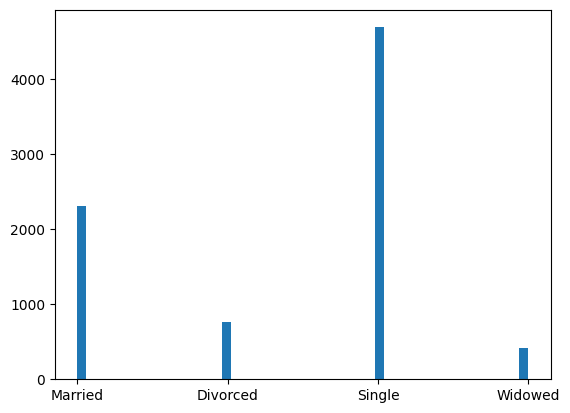

In [111]:
from matplotlib import pyplot

pyplot.hist(lg_census['Marital Status'], bins=50)
pyplot.show()

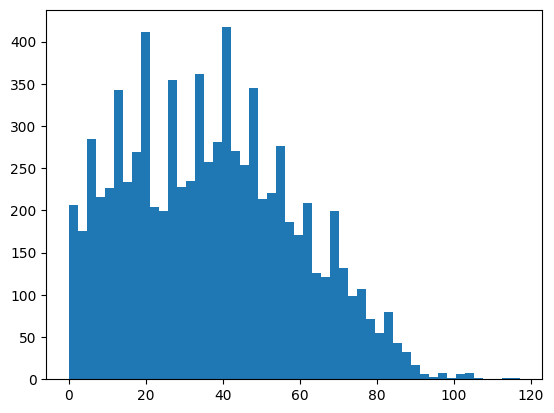

In [112]:
from matplotlib import pyplot

pyplot.hist(lg_census['Age'], bins=50)
pyplot.show()

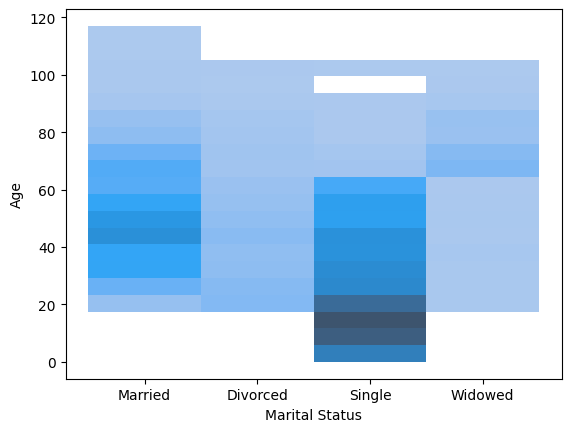

In [113]:
#lg_census = sns.displot(lg_census, x='Fare', y)
Age_marriage_plot = sns.histplot(lg_census, x = 'Marital Status', y = 'Age', bins = 20)

In [182]:
lg_census['Gender'].replace({'m':'Male', 'M':'Male', 'male':'Male', 'f':'Female', 'F':'Female', 'female':'Female'}, inplace=True)
lg_census['Gender'].unique()

array(['Male', 'Female'], dtype=object)

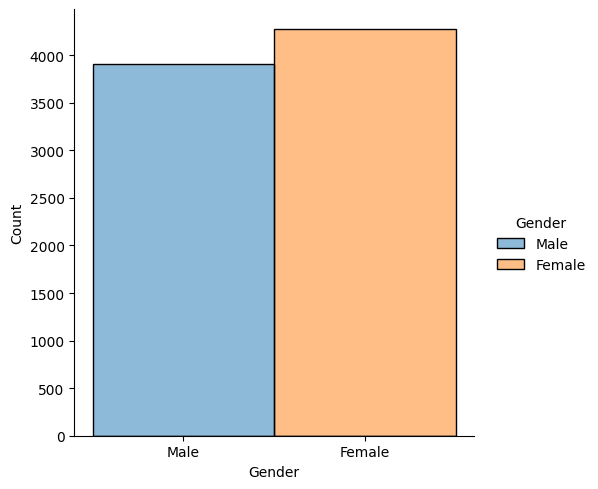

In [183]:
Gender_plot = sns.displot(lg_census, x = 'Gender', hue = 'Gender', bins = 20)

In [201]:
testdata = pd.DataFrame(lg_census['Gender'])

plt.figure(figsize=(13, 10), dpi=80)
group_col = 'Gender'
#order_of_bars = testdata['age'].unique()[::-1]
colors = [plt.cm.Spectral(i / float(len(testdata[group_col].unique()) - 1)) for i in range(len(testdata[group_col].unique()))]


for c, group in zip(colors, testdata[group_col].unique()):
    barplot = sns.barplot(x='Gender', data=testdata.loc[testdata[group_col] == group, :], 
                          color=c, label=group)

plt.xlabel("Gender")
#plt.ylabel("Age")
plt.yticks(fontsize=12)
plt.title("Pyramide", fontsize=22)
plt.legend()
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1040x800 with 0 Axes>

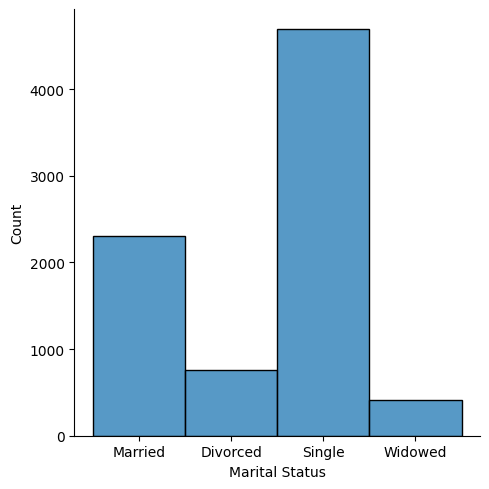

In [114]:
Marital_plot = sns.displot(lg_census, x='Marital Status')
#showing that the population has a high number of singles and married, these particular sets definitely needs accomodation.

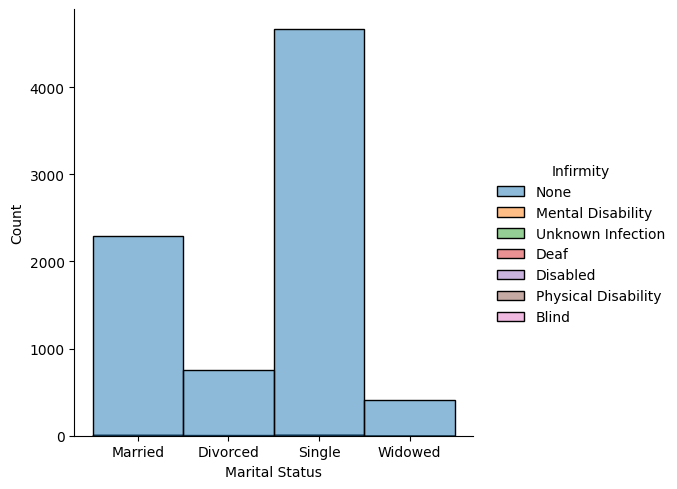

In [115]:
Marital_healthy_plot1 = sns.displot(lg_census, x='Marital Status', hue = 'Infirmity', bins=10, binwidth=20)

#Marital_healthy_plot1.savefig('./Marital_healthy_plot1.png')
#this plot clearly shows that a considerable number of the population are healthy and almost 5000 in this are single,followed by about 2200 people who are married and are healthy as well. This infers that they will have a higher chance of being employed or students and will definitely need housing.

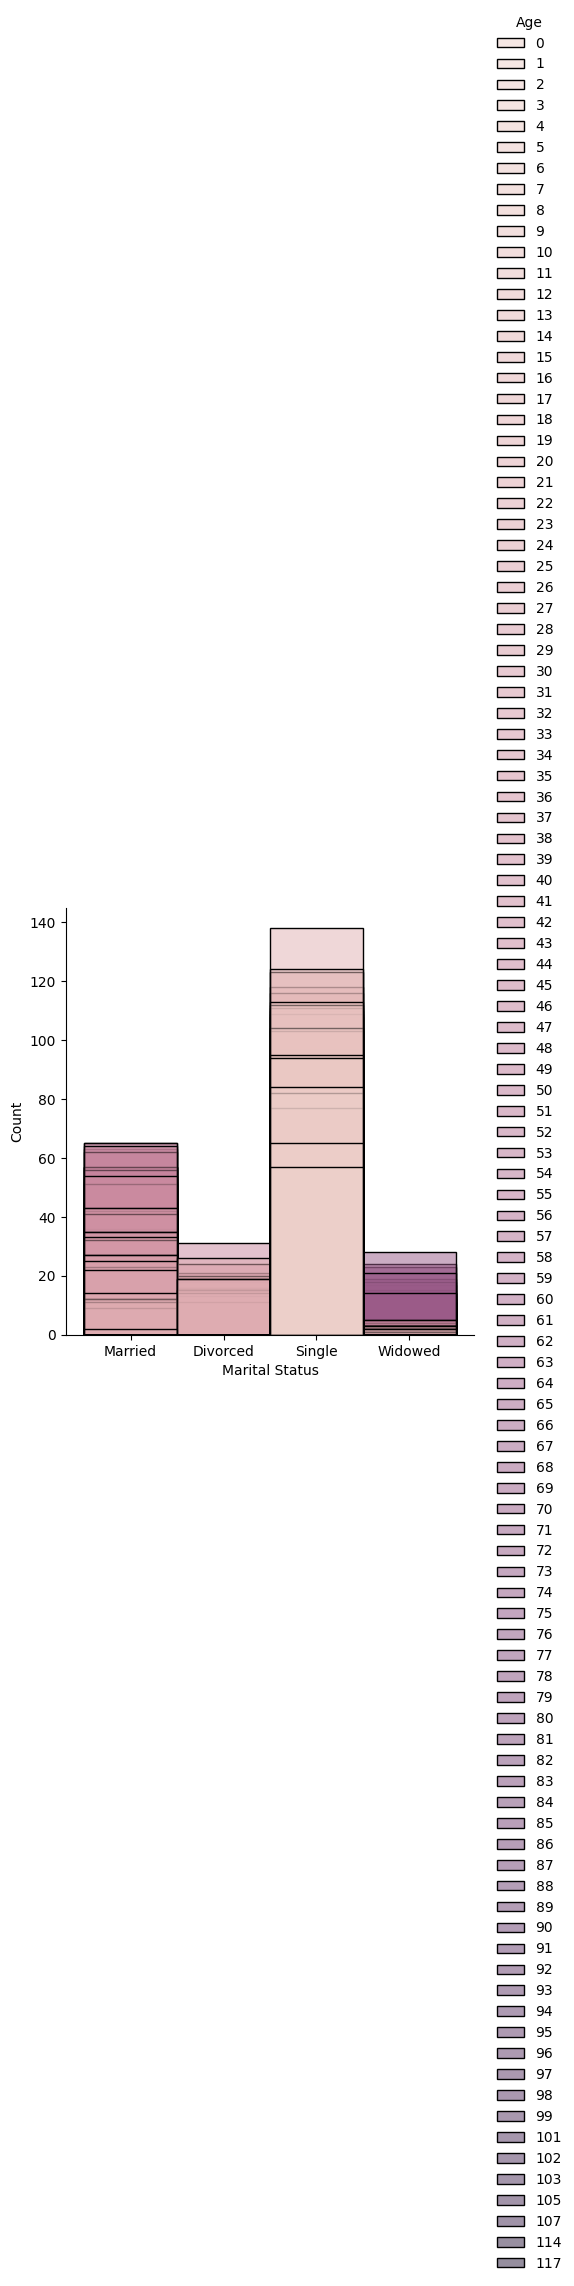

In [116]:
Marital_Age_plot1 = sns.displot(lg_census, x='Marital Status', hue = 'Age', bins=10, binwidth=20)

In [132]:
lg_census['Marital Status'].unique()

array(['Married', 'Divorced', 'Single', 'Widowed'], dtype=object)

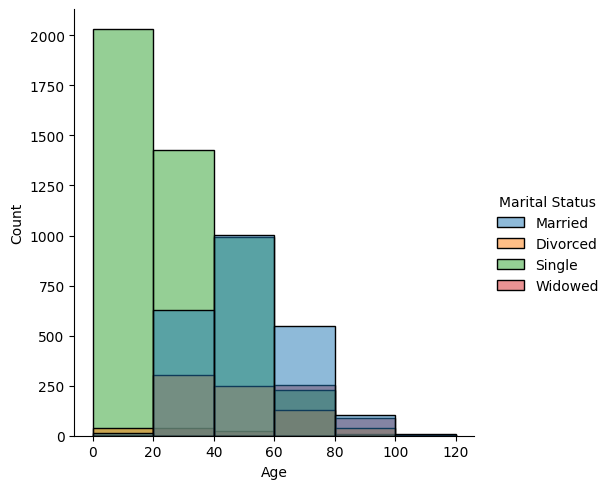

In [133]:
%matplotlib inline

Marital_Age_plot1 = sns.displot(lg_census, x='Age', hue = 'Marital Status', bins=20, binwidth=20)

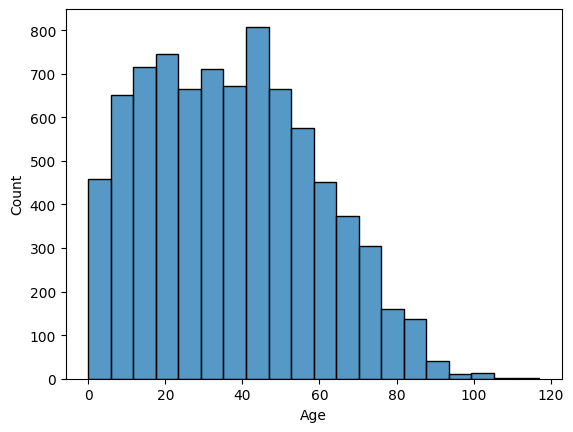

In [118]:
%matplotlib inline
Age_plot = sns.histplot(lg_census, x='Age', bins = 20)
#shows the age distribution in the population and its seen that ages between 16 to 65 have the highest number in that community
#these are the most viable in any population and can grow more than they can decline

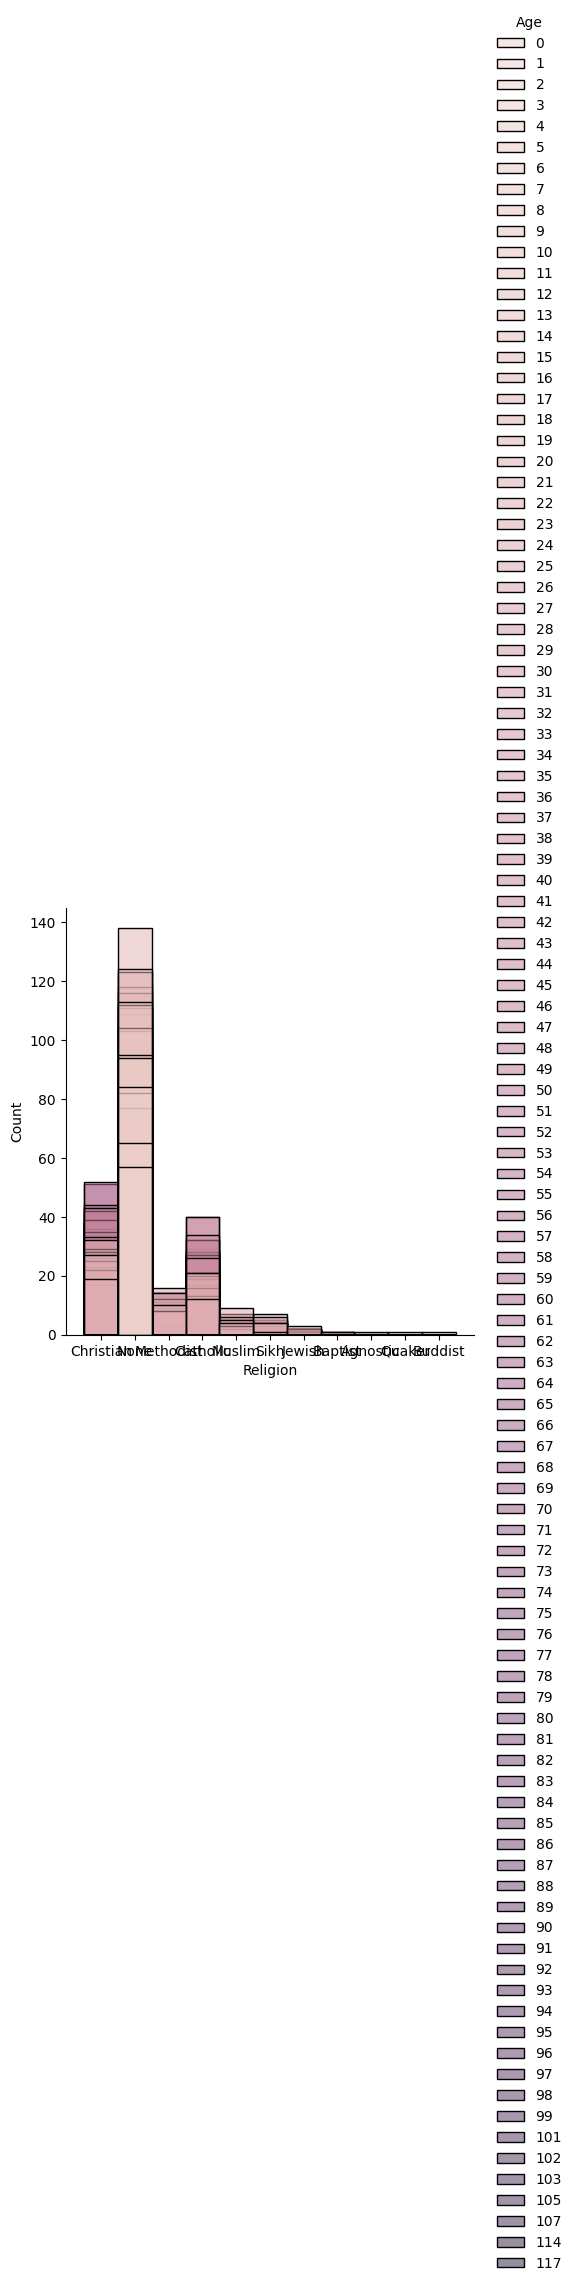

In [119]:
%matplotlib inline
Age_plot = sns.displot(lg_census, x='Religion', hue = 'Age', binwidth = 10)

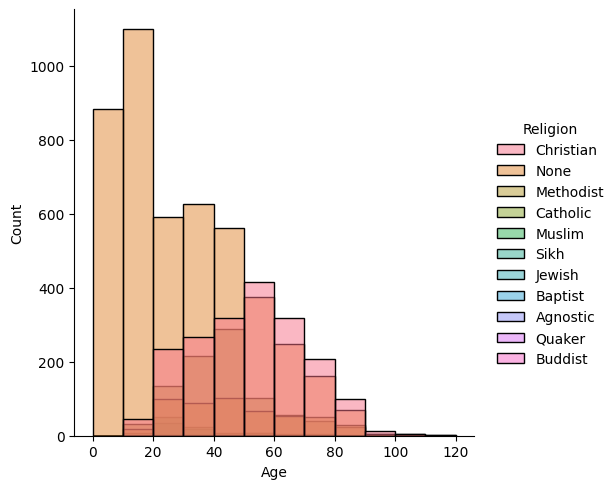

In [120]:
%matplotlib inline
Age_plot = sns.displot(lg_census, x='Age', hue = 'Religion', binwidth = 10)

In [121]:
lg_census['Occupation'].value_counts(dropna=True)
#Occupation comprises of several types, so we might have to group them into 4 basic classification to be able to see the distribution properly
#classifying into students, employed,unemployed, child and retired which are the 5 major entries here

Employed          4375
Student           2062
Retired            831
Unemployed         511
Not Applicable     388
Name: Occupation, dtype: int64

In [187]:
#function returns the employment status of the occupation provided, classifying them accordingly
def getEmploymentStatus(occupation):
    #print(occupation)
    if 'Student' in occupation:
        return 'Student'
    elif 'Unemployed' in occupation:
        return 'Unemployed'
    elif 'Child' in occupation:
        return 'Not Applicable'
    elif 'Retired' in occupation:
        return 'Retired'
    else:
        return 'Employed'

In [188]:
#replacing occupation class by applying the above function to occupation
lg_census['Occupation'] = lg_census['Occupation'].apply(getEmploymentStatus)

In [189]:

lg_census['Occupation'].value_counts()

Employed          4380
Student           2065
Retired            831
Unemployed         511
Not Applicable     388
Name: Occupation, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Employed'),
  Text(1, 0, 'Retired'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Unemployed'),
  Text(4, 0, 'Not Applicable')])

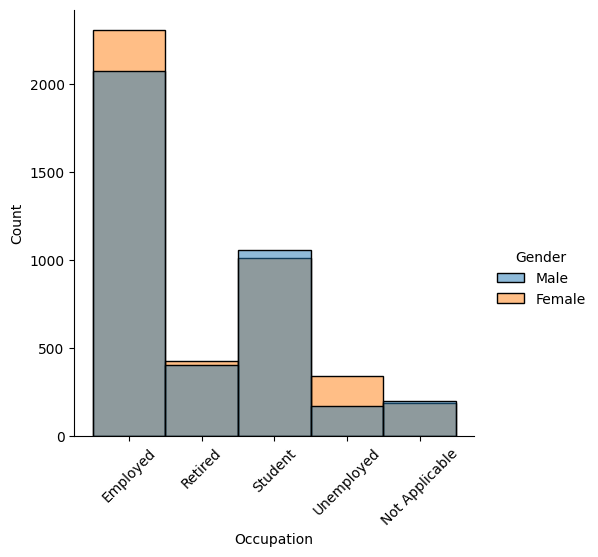

In [193]:
Occupation_plot = sns.displot(lg_census, x='Occupation', hue = 'Gender', binwidth = 10)
plt.xticks(rotation=45)

In [127]:
lg_census[(lg_census['Marital Status']=='Married') & (lg_census['Marital Status']=='Single')&(lg_census['Age'] > 18) & (lg_census['Age']< 65) & (lg_census['Infirmity']=='None')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,employment status


In [ ]:
#(ii) Low-density housing. This should be built if the population is “affluent” and there is 
#demand for large family housing